In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0001295401"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0001295401
SIC,6021
Description,NATIONAL COMMERCIAL BANKS
Name,"Bancorp, Inc."
Ticker,


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,18.0,9.832222e+00,1.691653e+00,7.69,7.947500e+00,9.665000e+00,11.57,12.01
interest income,1.0,2.680000e+07,NaN,26800000.00,2.680000e+07,2.680000e+07,26800000.00,26800000.00
net income,53.0,1.313796e+06,1.276537e+07,-31360000.00,5.880000e+02,1.210000e+06,3582000.00,61277000.00
net interest income,54.0,1.931985e+07,6.494559e+06,7362000.00,1.404100e+07,1.822750e+07,24112750.00,34010000.00
provision for loan losses,54.0,1.867032e+06,3.596394e+06,-8000000.00,3.125000e+05,7.850000e+05,2875000.00,17300000.00


# Plots

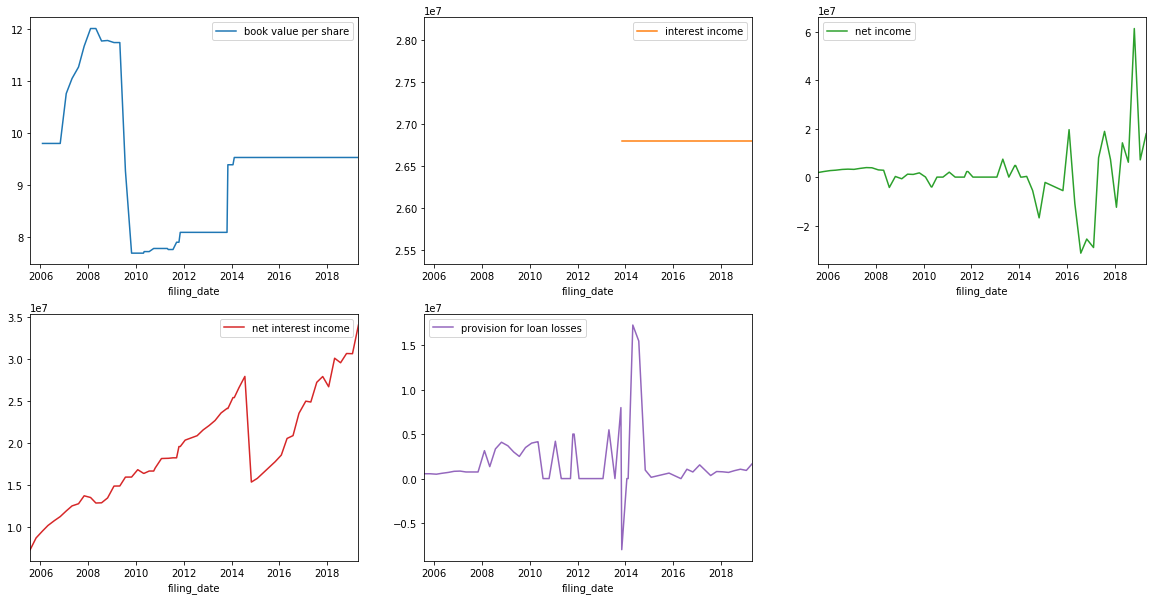

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                 
0001295401 book value per share        2005Q2 to 2005Q3: 2 periods    missing   
           book value per share        2006Q1 to 2006Q3: 3 periods    missing   
           book value per share                             2008Q1    missing   
           book value per share                             2009Q1    missing   
           book value per share                             2009Q4    missing   
           book value per share        2010Q3 to 2010Q4: 2 periods    missing   
           book value per share        2011Q4 to 2013Q2: 7 periods    missing   
           book value per share       2014Q1 to 2019Q1: 21 periods    missing   
           interest income            2005Q2 to 2013Q2: 33 periods    missing   
           interest income            2013Q4 to 2019Q1: 22 periods    missing   
           net income                                       2012Q1    missing   
           net income                  2015Q1 to 2015Q2: 2 periods    missing   
           net interest income                              2012Q1    missing   
           net interest income         2015Q1 to 2015Q2: 2 periods    missing   
           provision for loan losses                        2012Q1    missing   
           provision for loan losses                        2013Q3  duplicate   
           provision for loan losses   2015Q1 to 2015Q2: 2 periods    missing   
           total revenue                                      None      empty   

                                                 message  
cik        item                                           
0001295401 book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           provision for loan losses      Missing period  
           provision for loan losses    Duplicate period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()